In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#Ignore warnings
warnings.filterwarnings('ignore')

#Seaborn visualization set up
%matplotlib inline
sns.set_style('darkgrid')

In [70]:
#Reading the dataset

data = pd.read_csv('diabetesDataset.csv')
data.head(10)

,Age,BMI,Fasting blood sugar test,A1C,Outcome
0,46,26.2,124,6.0,1
1,50,25.4,194,8.5,2
2,73,20.2,197,8.6,2
3,50,33.6,119,5.9,1
4,31,26.6,98,5.0,0
5,32,23.3,95,5.0,0
6,21,28.1,85,4.5,0
7,33,39.3,130,6.1,1
8,30,25.6,93,5.0,0
9,26,31.0,124,6.0,1


In [71]:
data.shape

(599, 5)

In [72]:
data.describe()

,Age,BMI,Fasting blood sugar test,A1C,Outcome
count,599.000000,599.000000,599.000000,599.000000,599.000000
mean,37.168614,26.469549,119.813022,5.906678,0.979967
std,14.158324,6.071885,32.218087,2.450600,0.794799
min,16.000000,14.300000,73.000000,4.100000,0.000000
25%,25.000000,22.150000,90.000000,4.800000,0.000000
50%,33.000000,26.400000,119.000000,5.800000,1.000000
75%,46.000000,30.450000,135.000000,6.300000,2.000000
max,91.000000,40.000000,211.000000,59.000000,2.000000


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       599 non-null    int64  
 1   BMI                       599 non-null    float64
 2   Fasting blood sugar test  599 non-null    int64  
 3   A1C                       599 non-null    float64
 4   Outcome                   599 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 23.5 KB


In [74]:
data.columns

Index(['Age', 'BMI', 'Fasting blood sugar test', 'A1C', 'Outcome'], dtype='object')

In [75]:
data['Outcome'].value_counts()

1    221
0    195
2    183
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

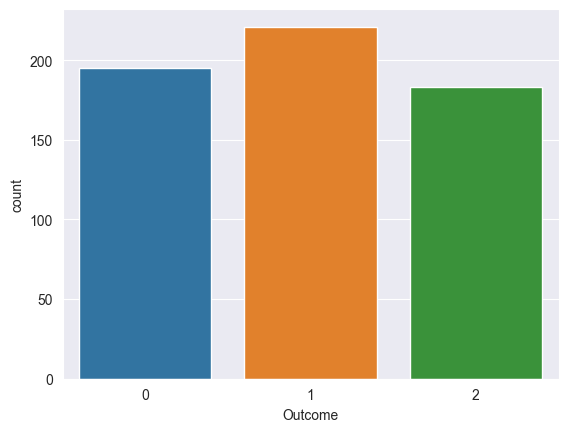

In [76]:
#Plotting the distribution of Outcome
sns.countplot(x= 'Outcome', data = data)

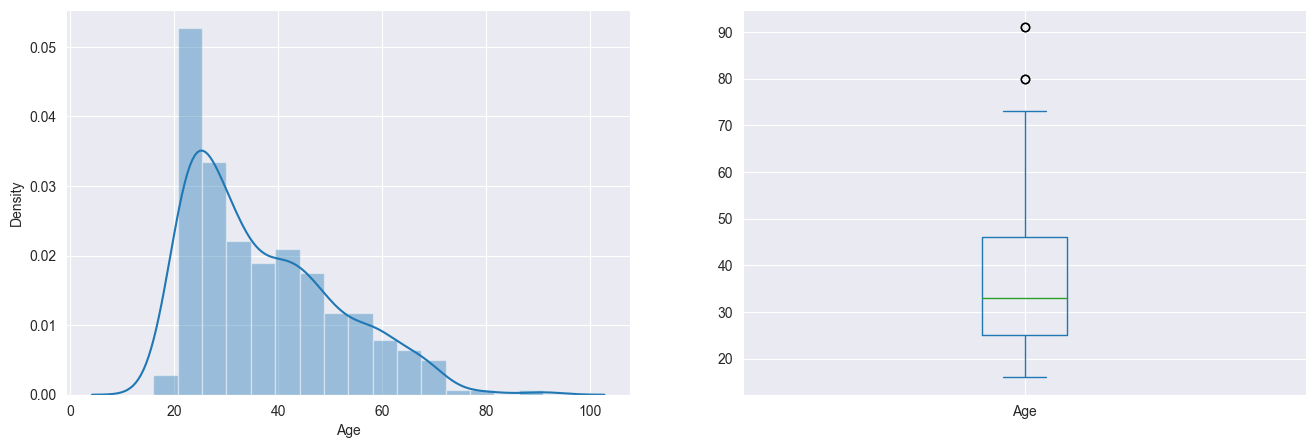

In [77]:
plt.figure(1)
plt.subplot(121), sns.distplot(data['Age'])
plt.subplot(122), data['Age'].plot.box(figsize=(16,5))
plt.show()

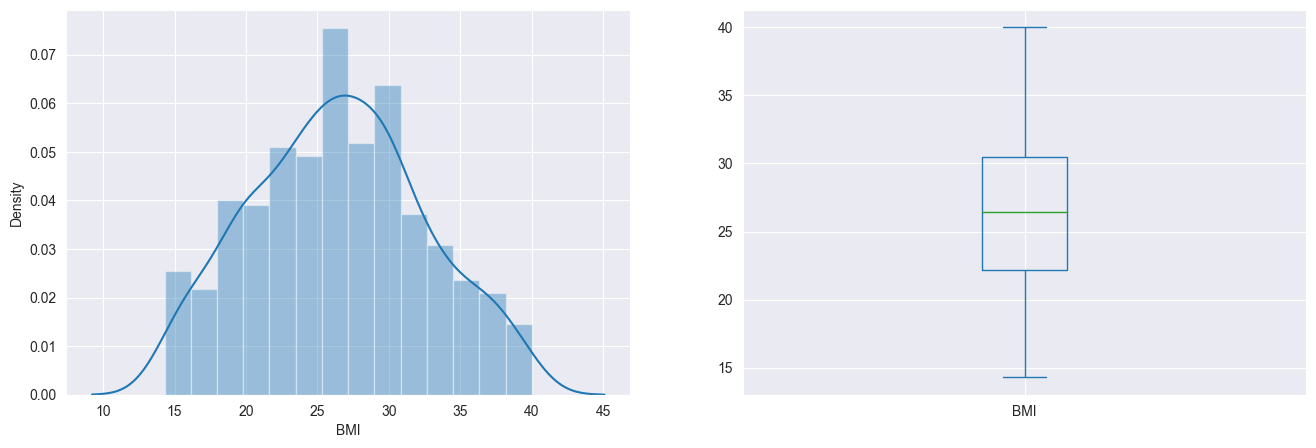

In [78]:
plt.figure(1)
plt.subplot(121), sns.distplot(data['BMI'])
plt.subplot(122), data['BMI'].plot.box(figsize=(16,5))
plt.show()

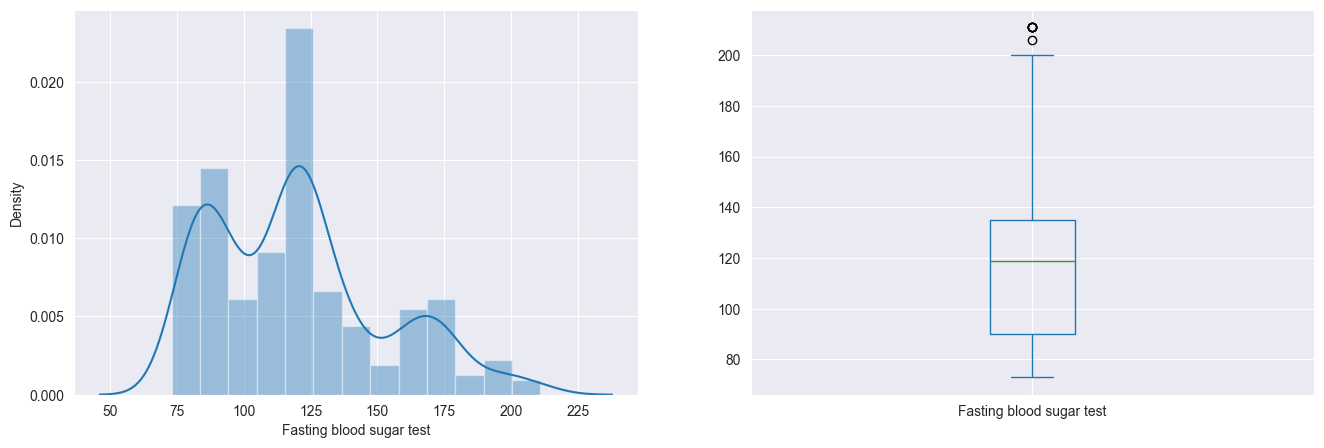

In [79]:
plt.figure(1)
plt.subplot(121), sns.distplot(data['Fasting blood sugar test'])
plt.subplot(122), data['Fasting blood sugar test'].plot.box(figsize=(16,5))
plt.show()

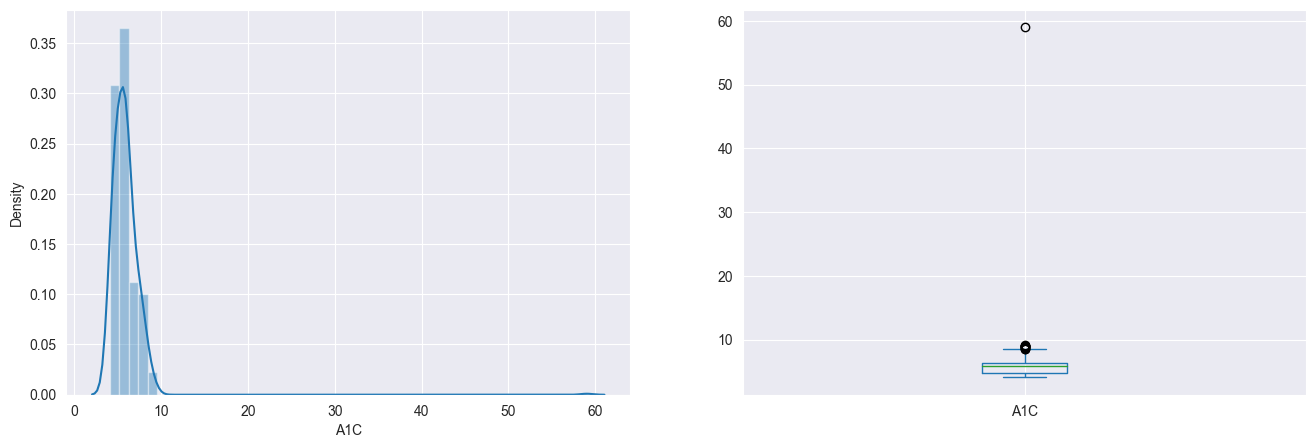

In [80]:
plt.figure(1)
plt.subplot(121), sns.distplot(data['A1C'])
plt.subplot(122), data['A1C'].plot.box(figsize=(16,5))
plt.show()

<AxesSubplot:xlabel='Outcome'>

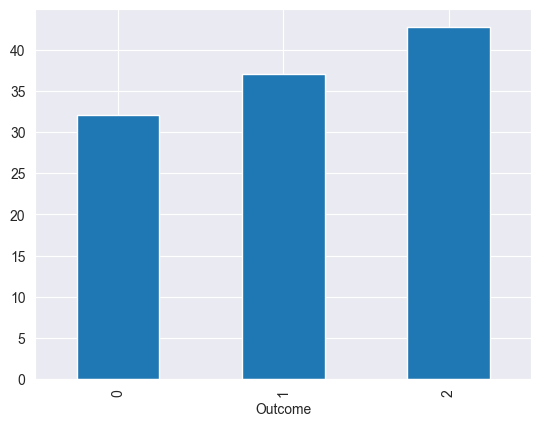

In [81]:
data.groupby('Outcome')['Age'].mean().plot.bar()

<AxesSubplot:xlabel='Outcome'>

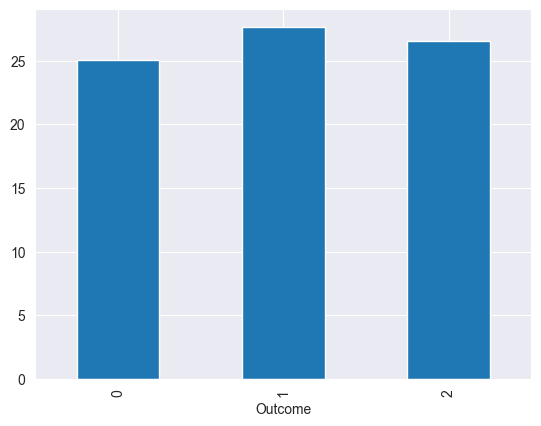

In [82]:
data.groupby('Outcome')['BMI'].mean().plot.bar()

<AxesSubplot:xlabel='Outcome'>

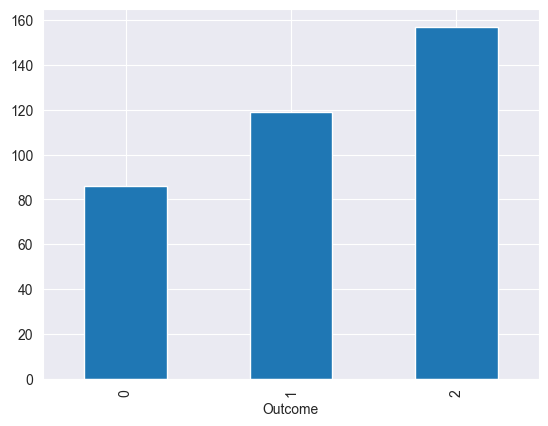

In [83]:
data.groupby('Outcome')['Fasting blood sugar test'].mean().plot.bar()

<AxesSubplot:xlabel='Outcome'>

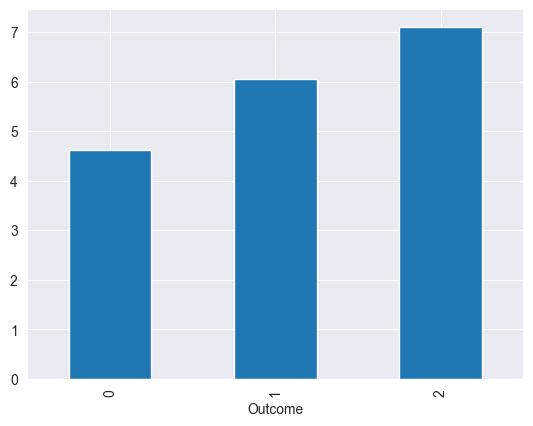

In [84]:
data.groupby('Outcome')['A1C'].mean().plot.bar()

In [85]:
#Check missing values

data.isnull().sum()

Age                         0
BMI                         0
Fasting blood sugar test    0
A1C                         0
Outcome                     0
dtype: int64

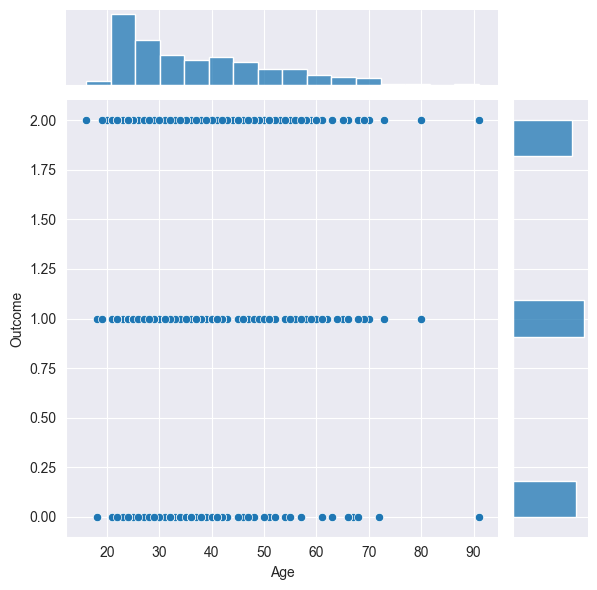

In [86]:
sns.jointplot(x='Age', y='Outcome', data=data)

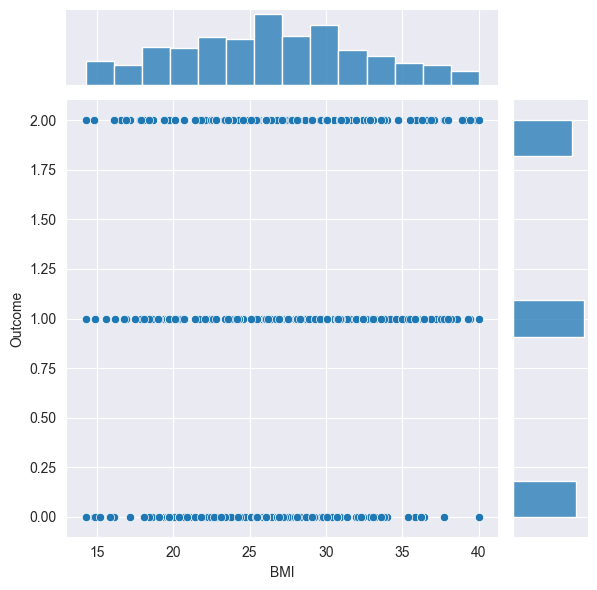

In [87]:
sns.jointplot(x='BMI', y='Outcome', data=data)

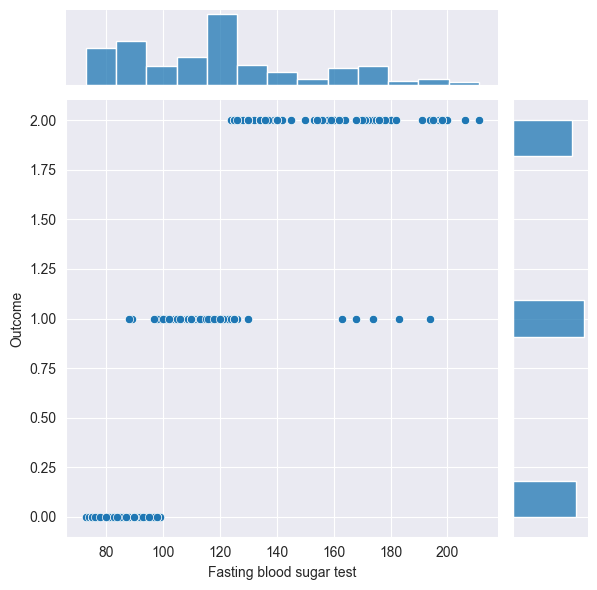

In [88]:
sns.jointplot(x='Fasting blood sugar test', y='Outcome', data=data)

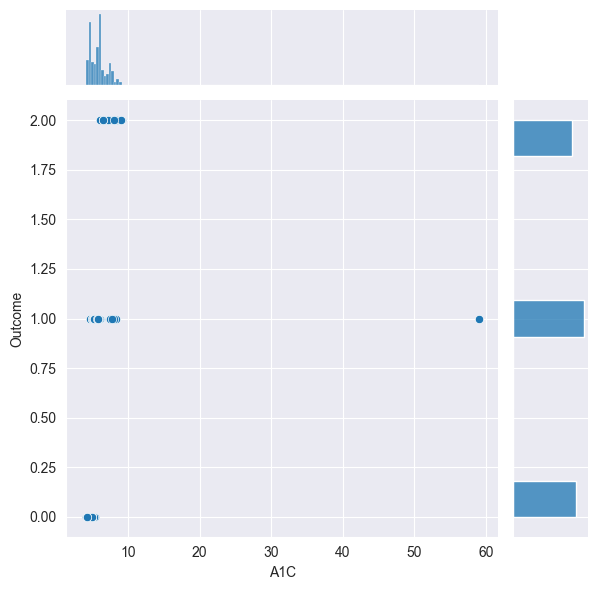

In [89]:
sns.jointplot(x='A1C', y='Outcome', data=data)

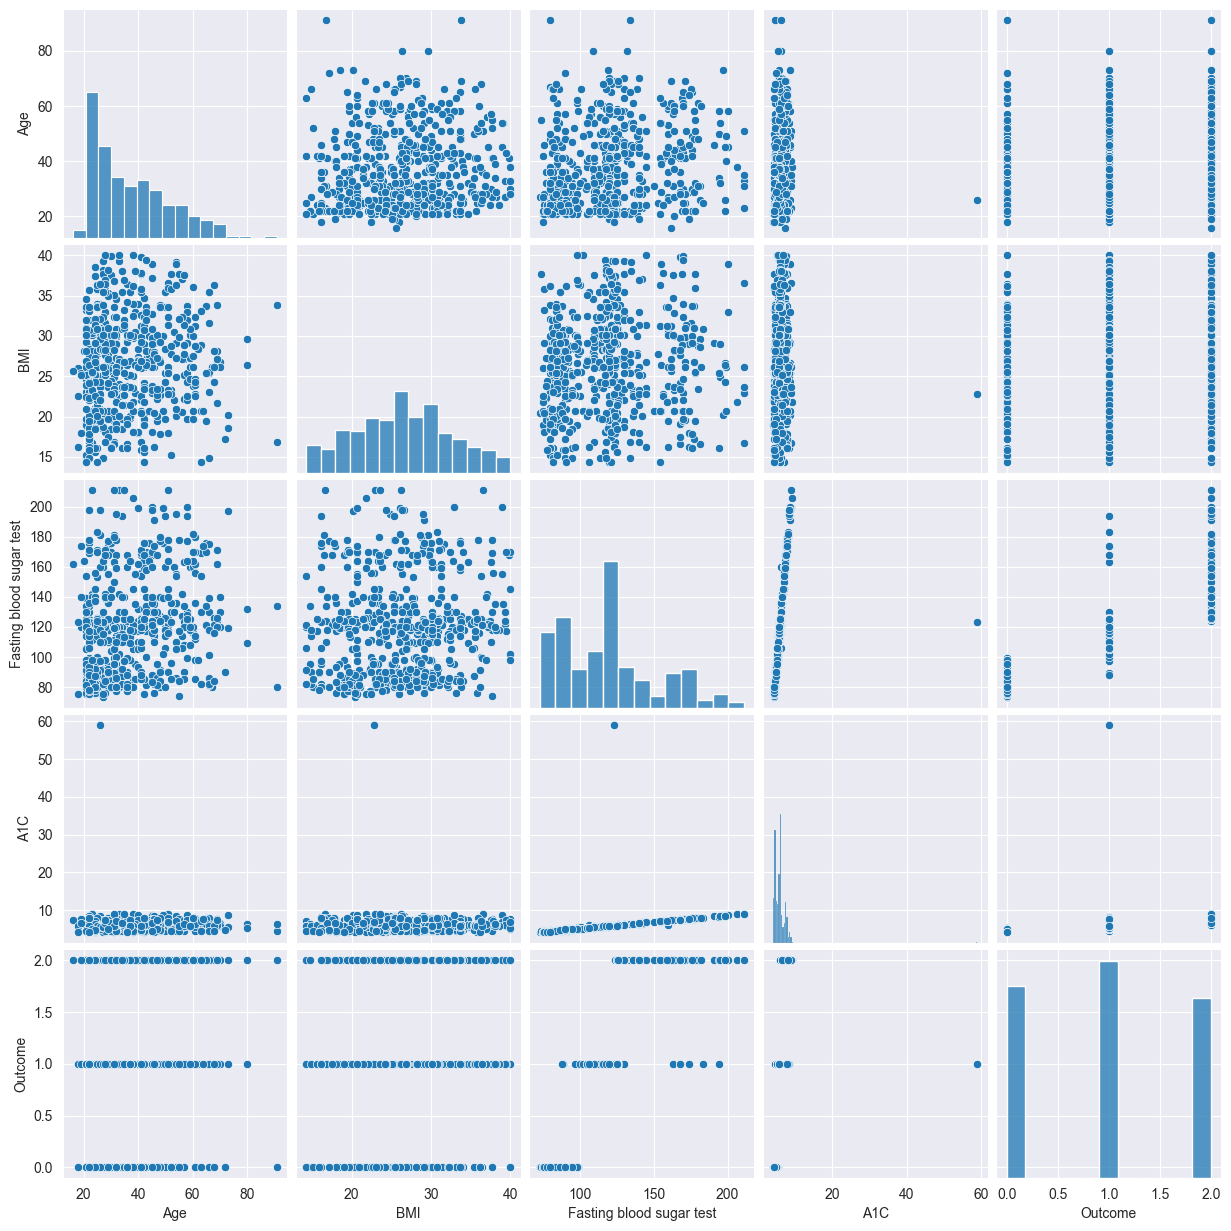

In [90]:
sns.pairplot(data)

In [91]:
#check correlations

data.corr()

,Age,BMI,Fasting blood sugar test,A1C,Outcome
Age,1.000000,0.113189,0.242708,0.083207,0.301818
BMI,0.113189,1.000000,0.079571,0.019120,0.096263
Fasting blood sugar test,0.242708,0.079571,1.000000,0.463672,0.875780
A1C,0.083207,0.019120,0.463672,1.000000,0.404449
Outcome,0.301818,0.096263,0.875780,0.404449,1.000000


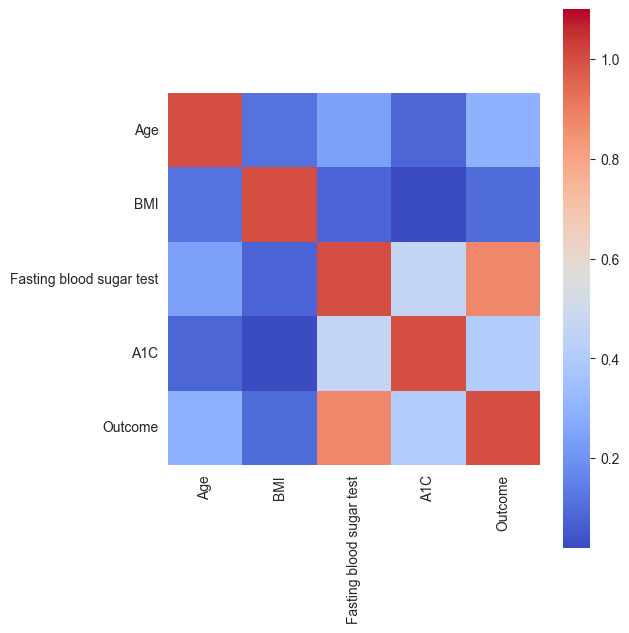

In [92]:
matrix = data.corr() 
ax = plt.subplots(figsize=(6, 7)), sns.heatmap(matrix, vmax=1.1, square=True, cmap="coolwarm")

In [93]:
#Splitting the dataset

X = data.drop(['Outcome'], axis=1)
y = data['Outcome']

In [94]:
print(X)

     Age   BMI  Fasting blood sugar test  A1C
0     46  26.2                       124  6.0
1     50  25.4                       194  8.5
2     73  20.2                       197  8.6
3     50  33.6                       119  5.9
4     31  26.6                        98  5.0
..   ...   ...                       ...  ...
594   35  23.6                       211  9.0
595   41  26.9                       120  5.8
596   34  21.4                       140  6.5
597   36  19.1                        80  4.3
598   60  26.1                       182  8.0

[599 rows x 4 columns]


In [95]:
print(y)

0      1
1      2
2      2
3      1
4      0
      ..
594    2
595    1
596    2
597    0
598    2
Name: Outcome, Length: 599, dtype: int64


# Train Test Split

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=3)

In [97]:
print(X.shape,X_train.shape,X_test.shape)

(599, 4) (479, 4) (120, 4)


# Remove null values

In [99]:
# Check columns with zero values
print("Total number of rows: {0}", format(len(data)))
print("Number of rows missing Age: {0}",
      format(len(data.loc[data['Age']==0])))
print("Number of rows missing BMI: {0}"
      , format(len(data.loc[data['BMI']==0])))
print("Number of rows missing Fasting blood sugar test: {0}",
      format(len(data.loc[data['Fasting blood sugar test']==0])))
print("Number of rows missing A1C: {0}",
      format(len(data.loc[data['A1C']==0])))

Total number of rows: {0} 599
Number of rows missing Age: {0} 0
Number of rows missing BMI: {0} 0
Number of rows missing Fasting blood sugar test: {0} 0
Number of rows missing A1C: {0} 0


In [100]:
#Imputing zeros values in the dataset

from sklearn.impute import SimpleImputer

fill_values = SimpleImputer(missing_values=0, strategy='mean')
X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

# Training and Evaluating Models

In [101]:
#Builidng the model using Logistic Regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [102]:
predictions = lr.predict(X_train)

In [103]:
#Getting the accuracy score for train in set
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(predictions,y_train)))

Accuracy_Score = 0.8768267223382046


In [104]:
#Getting the accuracy score for Logistic Regression testing set
from sklearn.metrics import accuracy_score

prediction = lr.predict(X_test)
lr_testdata_accuracy = accuracy_score(prediction,y_test)

In [105]:
print('Accuracy Score of Logistic Regression test data:',lr_testdata_accuracy)

Accuracy Score of Logistic Regression test data: 0.85


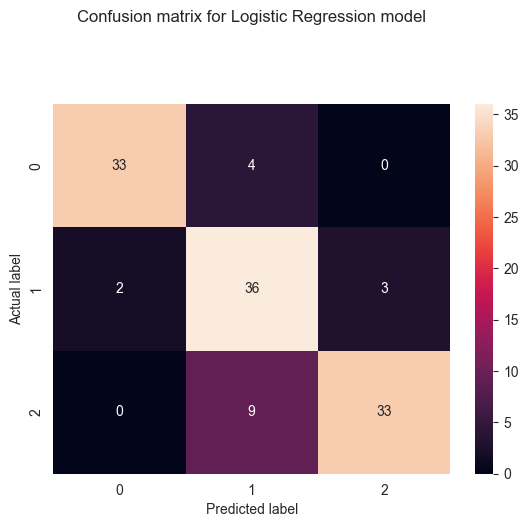

In [106]:
import seaborn as sns
sns.heatmap(metrics.confusion_matrix(y_test,prediction), annot=True)

plt.title('Confusion matrix for Logistic Regression model', y=1.2)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [113]:
# Building the model using KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [108]:
prediction = knn.predict(X_train)

In [109]:
#Getting the accuracy score
from sklearn import metrics
print("Accuracy Score =", format(metrics.accuracy_score(y_train,prediction)))

Accuracy Score = 0.9498956158663883


In [110]:
#Getting the accuracy score for Logistic Regression testing set
from sklearn.metrics import accuracy_score

prediction = lr.predict(X_test)
knn_testdata_accuracy = accuracy_score(prediction,y_test)

In [114]:
print('Accuracy Score of KNN classification test data:',knn_testdata_accuracy)

Accuracy Score of KNN classification test data: 0.85


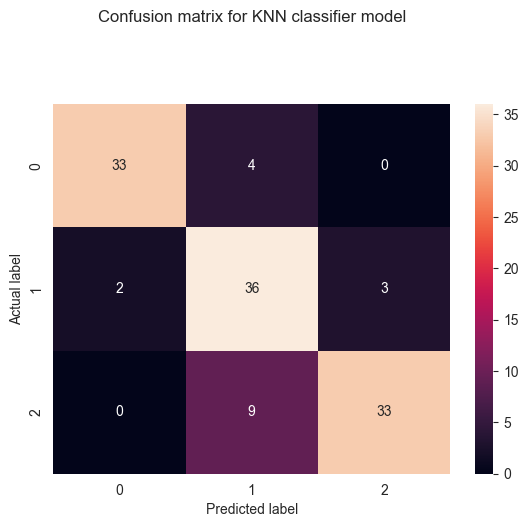

In [115]:
import seaborn as sns
sns.heatmap(metrics.confusion_matrix(y_test,prediction), annot=True)

plt.title('Confusion matrix for KNN classifier model', y=1.2)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [118]:
#Building model using Naive Byes

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [119]:
gnb_pred = gnb.predict(X_train)

In [120]:
#Getting accuracy score for Naive Byes

from sklearn import metrics
print("Accuracy Score =", format(metrics.accuracy_score(y_train, gnb_pred)))

Accuracy Score = 0.9248434237995825


In [121]:
#Getting the accuracy score for testing set
from sklearn.metrics import accuracy_score

prediction = gnb.predict(X_test)
gnb_testdata_accuracy = accuracy_score(prediction,y_test)

In [122]:
print('Accuracy Score of Naive Byes test data:',gnb_testdata_accuracy)

Accuracy Score of Naive Byes test data: 0.9333333333333333


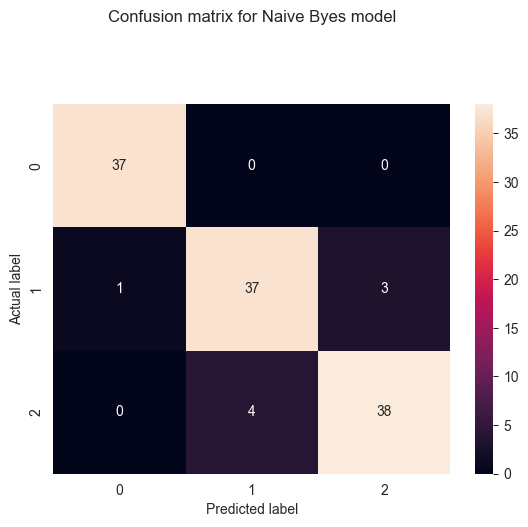

In [123]:
import seaborn as sns
sns.heatmap(metrics.confusion_matrix(y_test,prediction), annot=True)

plt.title('Confusion matrix for Naive Byes model', y=1.2)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Making a Predictive System

In [125]:
input_data = (46,26.2,124,6)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asfarray(input_data)

#reshape the array as we are predivting for one instance
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

#standarizing the input_data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(input_data_reshape)
std_data = scaler.transform(input_data_reshape)
print(std_data)

prediction = lr.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print(" You are Healthy")
elif(prediction[0] == 1):
    print("You are prediabetic")
else: 
    print("You are Diabetic")

[[0. 0. 0. 0.]]
[0]
 You are Healthy
